In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import missingno as msno

In [3]:
os.chdir('..')
dataset_path = os.path.join(os.getcwd(),'Datasets\\Best_Drama_Movies.csv')
dataset_path

'D:\\Babin\\Internship\\Data Science\\Datasets\\Best_Drama_Movies.csv'

## Read from movies dataset

In [4]:
df = pd.read_csv(dataset_path)
df.head()

,Title,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
0,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton",2h 22min,2:11,Drama,9.3 / 10,https://www.imdb.com/title/tt0111161/
1,The Lives of Others,2006,Florian Henckel von Donnersmarck,"Ulrich Mühe,Martina Gedeck,Sebastian Koch",2h 17min,NaN,Drama,8.4 / 10,https://www.imdb.com/title/tt0405094/
2,Like Stars on Earth,2007,Aamir Khan,"Darsheel Safary,Aamir Khan,Tisca Chopra",2h 45min,1:15,Drama,8.4 / 10,https://www.imdb.com/title/tt0986264/
3,Dangal,2016,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",2h 41min,3:15,Action,8.4 / 10,https://www.imdb.com/title/tt5074352/
4,Django Unchained,2012,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio",2h 45min,1:25,Drama,8.4 / 10,https://www.imdb.com/title/tt1853728/


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             183 non-null    object
 1   Year              183 non-null    int64 
 2   Director          183 non-null    object
 3   Stars             183 non-null    object
 4   Duration          183 non-null    object
 5   Trailer_Duration  165 non-null    object
 6   Genre             183 non-null    object
 7   Rating            183 non-null    object
 8   Movie_url         183 non-null    object
dtypes: int64(1), object(8)
memory usage: 13.0+ KB


In [6]:
df.describe()

,Year
count,183.000000
mean,1987.382514
std,25.136684
min,1921.000000
25%,1969.000000
50%,1995.000000
75%,2007.000000
max,2020.000000


## Getting the list of the columns

In [7]:
df.columns

Index(['Title', 'Year', 'Director', 'Stars', 'Duration', 'Trailer_Duration',
       'Genre', 'Rating', 'Movie_url'],
      dtype='object')

## Getting the non-null values for each of the column in the dataframe

In [8]:
df.count()

Title               183
Year                183
Director            183
Stars               183
Duration            183
Trailer_Duration    165
Genre               183
Rating              183
Movie_url           183
dtype: int64

## Grouping the dataset by genre and getting the count for each genre

In [9]:
df.groupby(by='Genre').agg('count')

,Title,Year,Director,Stars,Duration,Trailer_Duration,Rating,Movie_url
Genre,,,,,,,,
Action,22,22,22,22,22,19,22,22
Adventure,14,14,14,14,14,14,14,14
Animation,6,6,6,6,6,6,6,6
Biography,21,21,21,21,21,17,21,21
Comedy,15,15,15,15,15,12,15,15
Crime,33,33,33,33,33,31,33,33
Drama,72,72,72,72,72,66,72,72


In [10]:
df.groupby(by='Genre').agg(['count', 'max'])

Title                                Year       Director  \
          count                           max count   max    count   
Genre                                                                
Action       22                      Yojimbo     22  2019       22   
Adventure    14            The Wages of Fear     14  2014       14   
Animation     6                   Your Name.      6  2016        6   
Biography    21      The Wolf of Wall Street     21  2020       21   
Comedy       15                   Wild Tales     15  2019       15   
Crime        33  Witness for the Prosecution     33  2019       33   
Drama        72            Wild Strawberries     72  2019       72   

                             Stars  \
                         max count   
Genre                                
Action            Ron Howard    22   
Adventure  Wolfgang Petersen    14   
Animation       Roger Allers     6   
Biography       Tom McCarthy    21   
Comedy       Roberto Benigni    15   
Crime           Yavuz Turgul    33   
Drama            Çagan Irmak    72   

                                                           Duration            \
                                                       max    count       max   
Genre                                                                           
Action       Toshirô Mifune,Takashi Shimura,Keiko Tsushima       22  5h 21min   
Adventure        Yves Montand,Charles Vanel,Peter van Eyck       14   3h 5min   
Animation  Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi        6  1h 46min   
Biography  Viggo Mortensen,Mahershala Ali,Linda Cardellini       21  3h 25min   
Comedy      Robin Williams,Robert Sean Leonard,Ethan Hawke       15   2h 9min   
Crime      William H. Macy,Frances McDormand,Steve Buscemi       33   3h 9min   
Drama                 Çetin Tekindor,Fikret Kuskan,Hümeyra       72   3h 9min   

          Rating           Movie_url                                         
           count       max     count                                    max  
Genre                                                                        
Action        22  9.0 / 10        22  https://www.imdb.com/title/tt5074352/  
Adventure     14  8.6 / 10        14  https://www.imdb.com/title/tt1201607/  
Animation      6  8.5 / 10         6  https://www.imdb.com/title/tt5311514/  
Biography     21  8.9 / 10        21  https://www.imdb.com/title/tt8503618/  
Comedy        15  8.6 / 10        15  https://www.imdb.com/title/tt6751668/  
Crime         33  9.2 / 10        33  https://www.imdb.com/title/tt7286456/  
Drama         72  9.3 / 10        72  https://www.imdb.com/title/tt8613070/

## Getting the subset of the dataframe using the iloc and loc from 50th to 100th index

In [11]:
df.iloc[50:101]

,Title,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
50,Mary and Max,2009,Adam Elliot,"Toni Collette,Philip Seymour Hoffman,Eric Bana",1h 32min,2:31,Animation,8.1 / 10,https://www.imdb.com/title/tt0978762/
51,Mr. Smith Goes to Washington,1939,Frank Capra,"James Stewart,Jean Arthur,Claude Rains",2h 9min,1:37,Comedy,8.1 / 10,https://www.imdb.com/title/tt0031679/
52,The Help,2011,Tate Taylor,"Emma Stone,Viola Davis,Octavia Spencer",2h 26min,2:30,Drama,8.0 / 10,https://www.imdb.com/title/tt1454029/
53,Rebecca,1940,Alfred Hitchcock,"Laurence Olivier,Joan Fontaine,George Sanders",2h 10min,0:21,Drama,8.1 / 10,https://www.imdb.com/title/tt0032976/
54,The General,1926,Clyde Bruckman,"Buster Keaton,Marion Mack,Glen Cavender",1h 7min,1:03,Action,8.1 / 10,https://www.imdb.com/title/tt0017925/
55,Before Sunset,2004,Richard Linklater,"Ethan Hawke,Julie Delpy,Vernon Dobtcheff",1h 20min,2:14,Drama,8.0 / 10,https://www.imdb.com/title/tt0381681/
56,Gone with the Wind,1939,Victor Fleming,"Clark Gable,Vivien Leigh,Thomas Mitchell",3h 58min,1:56,Drama,8.1 / 10,https://www.imdb.com/title/tt0031381/
57,Throne of Blood,1957,Akira Kurosawa,"Toshirô Mifune,Minoru Chiaki,Isuzu Yamada",1h 50min,NaN,Drama,8.1 / 10,https://www.imdb.com/title/tt0050613/
58,On the Waterfront,1954,Elia Kazan,"Marlon Brando,Karl Malden,Lee J. Cobb",1h 48min,1:36,Crime,8.1 / 10,https://www.imdb.com/title/tt0047296/
59,The Battle of Algiers,1966,Gillo Pontecorvo,"Brahim Hadjadj,Jean Martin,Yacef Saadi",2h 1min,2:01,Drama,8.1 / 10,https://www.imdb.com/title/tt0058946/


## Checking if the title for each record is unique and if it is unqiue then setting the title as an index for the dataframe

In [12]:
df['Title'].nunique()

183

In [13]:
df.set_index(keys=['Title'], inplace = True)

In [14]:
df.head()

,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
Title,,,,,,,,
The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton",2h 22min,2:11,Drama,9.3 / 10,https://www.imdb.com/title/tt0111161/
The Lives of Others,2006,Florian Henckel von Donnersmarck,"Ulrich Mühe,Martina Gedeck,Sebastian Koch",2h 17min,NaN,Drama,8.4 / 10,https://www.imdb.com/title/tt0405094/
Like Stars on Earth,2007,Aamir Khan,"Darsheel Safary,Aamir Khan,Tisca Chopra",2h 45min,1:15,Drama,8.4 / 10,https://www.imdb.com/title/tt0986264/
Dangal,2016,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",2h 41min,3:15,Action,8.4 / 10,https://www.imdb.com/title/tt5074352/
Django Unchained,2012,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio",2h 45min,1:25,Drama,8.4 / 10,https://www.imdb.com/title/tt1853728/


In [15]:
df['Genre'].value_counts()

Drama        72
Crime        33
Action       22
Biography    21
Comedy       15
Adventure    14
Animation     6
Name: Genre, dtype: int64

## Boolean Indexing to get all of the dramas

In [16]:
df[df['Genre']=='Drama']

,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
Title,,,,,,,,
The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton",2h 22min,2:11,Drama,9.3 / 10,https://www.imdb.com/title/tt0111161/
The Lives of Others,2006,Florian Henckel von Donnersmarck,"Ulrich Mühe,Martina Gedeck,Sebastian Koch",2h 17min,NaN,Drama,8.4 / 10,https://www.imdb.com/title/tt0405094/
Like Stars on Earth,2007,Aamir Khan,"Darsheel Safary,Aamir Khan,Tisca Chopra",2h 45min,1:15,Drama,8.4 / 10,https://www.imdb.com/title/tt0986264/
Django Unchained,2012,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio",2h 45min,1:25,Drama,8.4 / 10,https://www.imdb.com/title/tt1853728/
Anand,1971,Hrishikesh Mukherjee,"Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal",2h 2min,1:28,Drama,8.5 / 10,https://www.imdb.com/title/tt0066763/
...,...,...,...,...,...,...,...,...
It's a Wonderful Life,1946,Frank Capra,"James Stewart,Donna Reed,Lionel Barrymore",2h 10min,1:00,Drama,8.6 / 10,https://www.imdb.com/title/tt0038650/
Saving Private Ryan,1998,Steven Spielberg,"Tom Hanks,Matt Damon,Tom Sizemore",2h 49min,2:10,Drama,8.6 / 10,https://www.imdb.com/title/tt0120815/
One Flew Over the Cuckoo's Nest,1975,Milos Forman,"Jack Nicholson,Louise Fletcher,Will Sampson",2h 13min,2:35,Drama,8.7 / 10,https://www.imdb.com/title/tt0073486/


# Using apply to change the duration of all the "Drama"

In [17]:
copy_df = df.copy(deep=True)
copy_df.head()

,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
Title,,,,,,,,
The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton",2h 22min,2:11,Drama,9.3 / 10,https://www.imdb.com/title/tt0111161/
The Lives of Others,2006,Florian Henckel von Donnersmarck,"Ulrich Mühe,Martina Gedeck,Sebastian Koch",2h 17min,NaN,Drama,8.4 / 10,https://www.imdb.com/title/tt0405094/
Like Stars on Earth,2007,Aamir Khan,"Darsheel Safary,Aamir Khan,Tisca Chopra",2h 45min,1:15,Drama,8.4 / 10,https://www.imdb.com/title/tt0986264/
Dangal,2016,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",2h 41min,3:15,Action,8.4 / 10,https://www.imdb.com/title/tt5074352/
Django Unchained,2012,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio",2h 45min,1:25,Drama,8.4 / 10,https://www.imdb.com/title/tt1853728/


In [18]:
copy_df.dtypes

Year                 int64
Director            object
Stars               object
Duration            object
Trailer_Duration    object
Genre               object
Rating              object
Movie_url           object
dtype: object

In [19]:
copy_df.apply(lambda x: '50 minutes' if x.Genre=='Drama' else x.Duration, axis=1)

Title
The Shawshank Redemption                          50 minutes
The Lives of Others                               50 minutes
Like Stars on Earth                               50 minutes
Dangal                                              2h 41min
Django Unchained                                  50 minutes
                                                     ...    
The Godfather                                       2h 55min
The Lord of the Rings: The Return of the King       3h 21min
The Godfather: Part II                              3h 22min
The Dark Knight                                     2h 32min
Seven Samurai                                       3h 27min
Length: 183, dtype: object

In [20]:
copy_df.head()

,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
Title,,,,,,,,
The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton",2h 22min,2:11,Drama,9.3 / 10,https://www.imdb.com/title/tt0111161/
The Lives of Others,2006,Florian Henckel von Donnersmarck,"Ulrich Mühe,Martina Gedeck,Sebastian Koch",2h 17min,NaN,Drama,8.4 / 10,https://www.imdb.com/title/tt0405094/
Like Stars on Earth,2007,Aamir Khan,"Darsheel Safary,Aamir Khan,Tisca Chopra",2h 45min,1:15,Drama,8.4 / 10,https://www.imdb.com/title/tt0986264/
Dangal,2016,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",2h 41min,3:15,Action,8.4 / 10,https://www.imdb.com/title/tt5074352/
Django Unchained,2012,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio",2h 45min,1:25,Drama,8.4 / 10,https://www.imdb.com/title/tt1853728/


## Checking the null values

In [21]:
copy_df.isnull().sum()

Year                 0
Director             0
Stars                0
Duration             0
Trailer_Duration    18
Genre                0
Rating               0
Movie_url            0
dtype: int64

# Visualizing the null values

<AxesSubplot:>

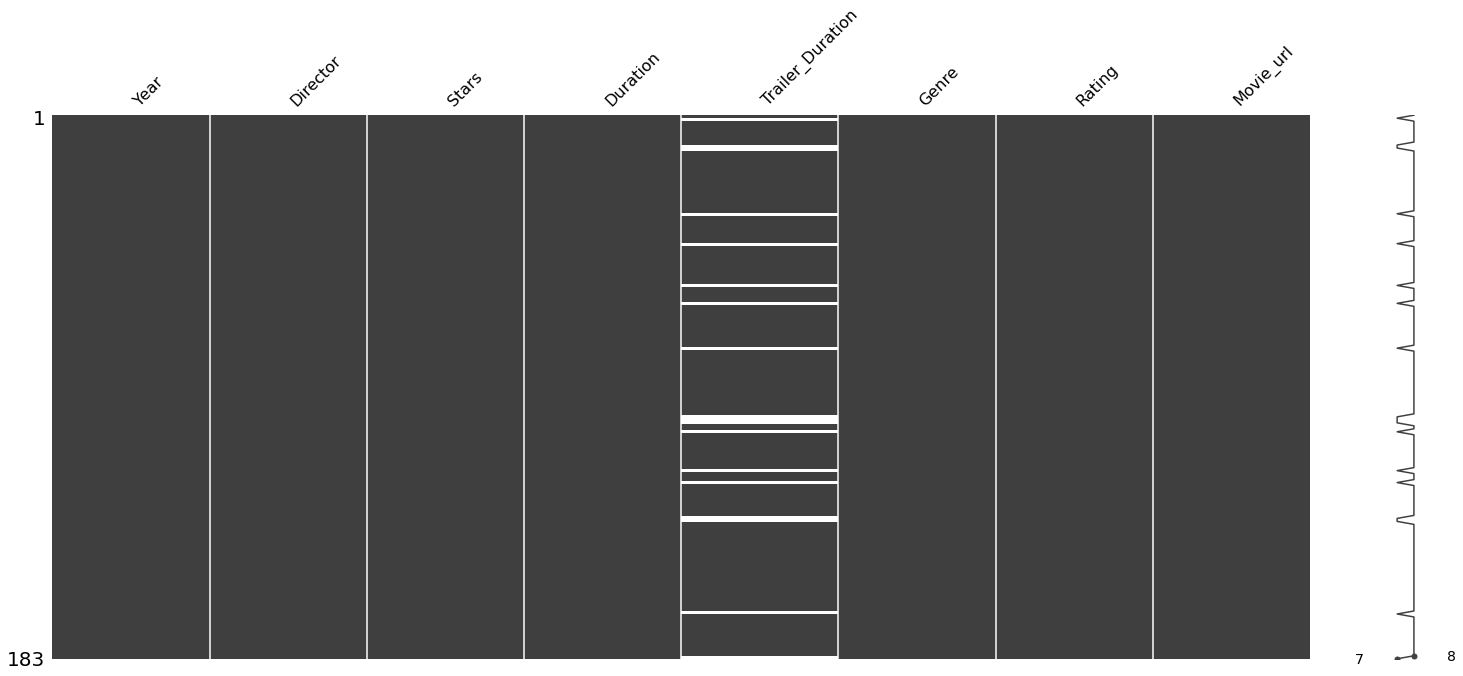

In [22]:
msno.matrix(df)

<AxesSubplot:>

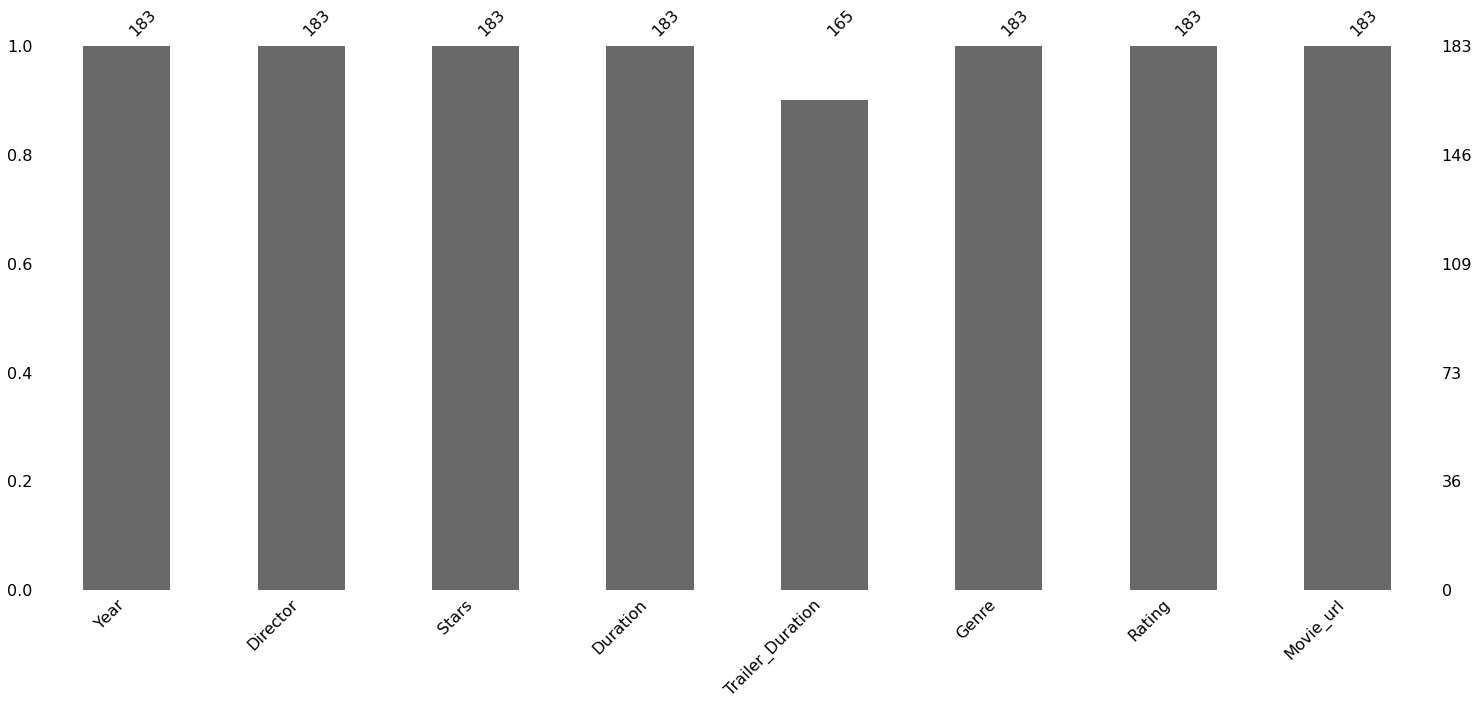

In [23]:
msno.bar(df)

In [24]:
copy_df.fillna(method='ffill',inplace=True)

In [25]:
copy_df.isnull().sum()

Year                0
Director            0
Stars               0
Duration            0
Trailer_Duration    0
Genre               0
Rating              0
Movie_url           0
dtype: int64

## Sorting the DataFrame by Year Values

In [26]:
copy_df.head()

,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
Title,,,,,,,,
The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton",2h 22min,2:11,Drama,9.3 / 10,https://www.imdb.com/title/tt0111161/
The Lives of Others,2006,Florian Henckel von Donnersmarck,"Ulrich Mühe,Martina Gedeck,Sebastian Koch",2h 17min,2:11,Drama,8.4 / 10,https://www.imdb.com/title/tt0405094/
Like Stars on Earth,2007,Aamir Khan,"Darsheel Safary,Aamir Khan,Tisca Chopra",2h 45min,1:15,Drama,8.4 / 10,https://www.imdb.com/title/tt0986264/
Dangal,2016,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",2h 41min,3:15,Action,8.4 / 10,https://www.imdb.com/title/tt5074352/
Django Unchained,2012,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio",2h 45min,1:25,Drama,8.4 / 10,https://www.imdb.com/title/tt1853728/


In [27]:
copy_df.sort_values(by=['Year'],inplace=True)

In [28]:
copy_df.head()

,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
Title,,,,,,,,
The Kid,1921,Charles Chaplin,"Charles Chaplin,Edna Purviance,Jackie Coogan",1h 8min,3:46,Comedy,8.3 / 10,https://www.imdb.com/title/tt0012349/
The Gold Rush,1925,Charles Chaplin,"Charles Chaplin,Mack Swain,Tom Murray",1h 35min,1:25,Adventure,8.2 / 10,https://www.imdb.com/title/tt0015864/
The General,1926,Clyde Bruckman,"Buster Keaton,Marion Mack,Glen Cavender",1h 7min,1:03,Action,8.1 / 10,https://www.imdb.com/title/tt0017925/
Metropolis,1927,Fritz Lang,"Brigitte Helm,Alfred Abel,Gustav Fröhlich",2h 33min,2:00,Drama,8.3 / 10,https://www.imdb.com/title/tt0017136/
The Passion of Joan of Arc,1928,Carl Theodor Dreyer,"Maria Falconetti,Eugene Silvain,André Berley",1h 54min,1:03,Biography,8.1 / 10,https://www.imdb.com/title/tt0019254/


In [29]:
copy_df.apply(lambda x: x.Director.upper(), axis = 1)

Title
The Kid                            CHARLES CHAPLIN
The Gold Rush                      CHARLES CHAPLIN
The General                         CLYDE BRUCKMAN
Metropolis                              FRITZ LANG
The Passion of Joan of Arc     CARL THEODOR DREYER
                                      ...         
Parasite                              BONG JOON HO
Avengers: Endgame                    ANTHONY RUSSO
Joker                                TODD PHILLIPS
1917                                    SAM MENDES
Hamilton                               THOMAS KAIL
Length: 183, dtype: object

In [30]:
copy_df.head()

,Year,Director,Stars,Duration,Trailer_Duration,Genre,Rating,Movie_url
Title,,,,,,,,
The Kid,1921,Charles Chaplin,"Charles Chaplin,Edna Purviance,Jackie Coogan",1h 8min,3:46,Comedy,8.3 / 10,https://www.imdb.com/title/tt0012349/
The Gold Rush,1925,Charles Chaplin,"Charles Chaplin,Mack Swain,Tom Murray",1h 35min,1:25,Adventure,8.2 / 10,https://www.imdb.com/title/tt0015864/
The General,1926,Clyde Bruckman,"Buster Keaton,Marion Mack,Glen Cavender",1h 7min,1:03,Action,8.1 / 10,https://www.imdb.com/title/tt0017925/
Metropolis,1927,Fritz Lang,"Brigitte Helm,Alfred Abel,Gustav Fröhlich",2h 33min,2:00,Drama,8.3 / 10,https://www.imdb.com/title/tt0017136/
The Passion of Joan of Arc,1928,Carl Theodor Dreyer,"Maria Falconetti,Eugene Silvain,André Berley",1h 54min,1:03,Biography,8.1 / 10,https://www.imdb.com/title/tt0019254/


# Visualizing the Genre count

In [31]:
copy_df['Genre'].value_counts()

Drama        72
Crime        33
Action       22
Biography    21
Comedy       15
Adventure    14
Animation     6
Name: Genre, dtype: int64

In [32]:
copy_df['Genre'].value_counts().index

Index(['Drama', 'Crime', 'Action', 'Biography', 'Comedy', 'Adventure',
       'Animation'],
      dtype='object')

In [33]:
copy_df['Genre'].value_counts().values

array([72, 33, 22, 21, 15, 14,  6], dtype=int64)

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

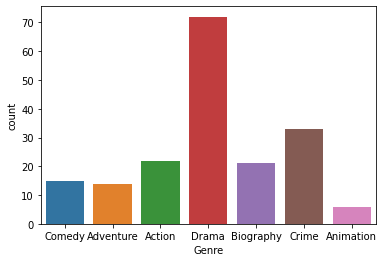

In [34]:
sns.countplot(copy_df['Genre'])

# Data Visualization with Matplotlib

In [65]:
seattle_weather = pd.DataFrame({
    'MONTH': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'MLY-TAVG-NORMAL': [42.1,43.4,46.6,50.5,56.0,61.0,65.9,66.5,61.6,53.3,46.2,41.1]
})
seattle_weather

,MONTH,MLY-TAVG-NORMAL
0,Jan,42.1
1,Feb,43.4
2,Mar,46.6
3,Apr,50.5
4,May,56.0
5,Jun,61.0
6,Jul,65.9
7,Aug,66.5
8,Sep,61.6
9,Oct,53.3


In [66]:
austin_weather = pd.DataFrame({
    'MONTH': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'MLY-TAVG-NORMAL': [52.1,53.4,56.6,60.5,66.0,71.0,75.9,76.5,71.6,63.3,56.2,51.1]
})
austin_weather

,MONTH,MLY-TAVG-NORMAL
0,Jan,52.1
1,Feb,53.4
2,Mar,56.6
3,Apr,60.5
4,May,66.0
5,Jun,71.0
6,Jul,75.9
7,Aug,76.5
8,Sep,71.6
9,Oct,63.3


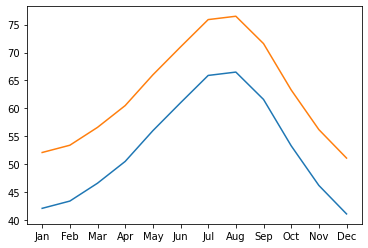

In [69]:
fig, ax= plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])
ax.plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

### Customizing our plots

#### Adding Markers

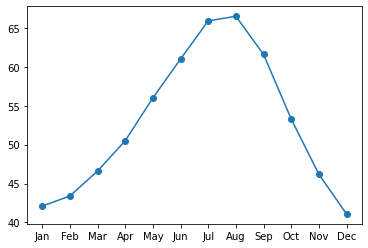

In [77]:
fig, ax= plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], marker='o')
plt.show()

### Setting the Line Style

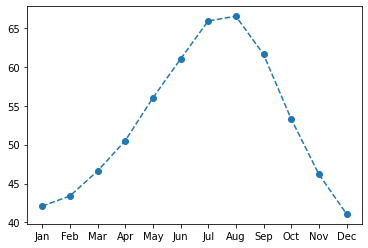

In [74]:
fig, ax= plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], marker ='o', linestyle='--')
plt.show()

#### Eliminating Lines With LineStyle

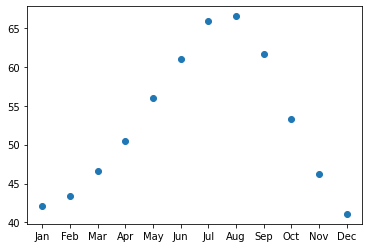

In [75]:
fig, ax= plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'],
        marker ='o', linestyle='None')
plt.show()

#### Choosing Color

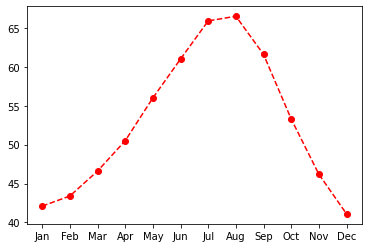

In [76]:
fig, ax= plt.subplots()
ax.plot(seattle_weather['MONTH'], 
        seattle_weather['MLY-TAVG-NORMAL'], 
        marker ='o', linestyle='--',
       color='r')
plt.show()

#### Customizing the axes lables